# Part I - (bike sharing system)
## by (Mahmood Al-Saheel)

## Introduction

The dataset contains information about rides made in a bike sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?
There are 16 columns in the dataset and 183412 records, User inforamtion in the dataset configure of these columns (member_birth_year , member_gender,user_type)	

### What is/are the main feature(s) of interest in your dataset?
Based on the columns in the dataset, which include details about bike rides .

> Columns: duration_sec	start_time	end_time	start_station_id	start_station_name	start_station_latitude	start_station_longitude	end_station_id	end_station_name	end_station_latitude	end_station_longitude	bike_id	user_type	member_birth_year	member_gender	bike_share_for_all_trip .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> By analyzing these features in relation to each other we can notice the main features from the dataset : user_type	member_birth_year	member_gender	bike_share_for_all_trip duration_sec

In [26]:
df.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


## Univariate Exploration

Text(0, 0.5, 'Count')

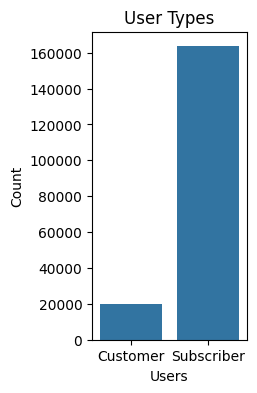

In [27]:

plt.figure(figsize=(2, 4))
sns.countplot(data=df, x='user_type')
plt.title('User Types')
plt.xlabel('Users')
plt.ylabel('Count')



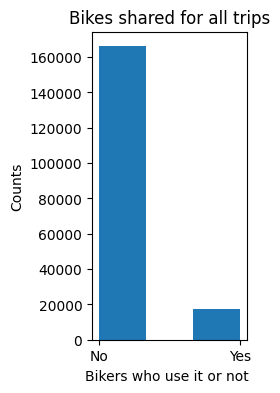

In [21]:
plt.figure(figsize=(2, 4))
plt.hist(data=df, x='bike_share_for_all_trip',bins=3)

def plot_la(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

title='Bikes shared for all trips'
x='Bikers who use it or not '
y='Counts'
plot_la(title,x,y)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the chart displays the distribution of the user_type variable from the dataset, chart provides a visual comparison between the number of "Customers" and "Subscribers" in the dataset. Based on the chart we can determine which kind of user is more common based on how the chart looks. In the Second chart displays the distribtaion of bike_share_for_all_trip and we can notice clearly the number of counts of  who not shared the bike much biger than who shared it

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There's nothing unsual in user_type since the data is qualtitative and were visualised using histogram.

## Bivariate Exploration


C:\Users\Mahmood\AppData\Local\Temp\ipykernel_20248\1920214438.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(min_outliers[a])+' min outlier', xy=(a, min_outliers[a]), xytext=(40, 10),
C:\Users\Mahmood\AppData\Local\Temp\ipykernel_20248\1920214438.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(min_outliers[a])+' min outlier', xy=(a, min_outliers[a]), xytext=(40, 10),
C:\Users\Mahmood\AppData\Local\Temp\ipykernel_20248\1920214438.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

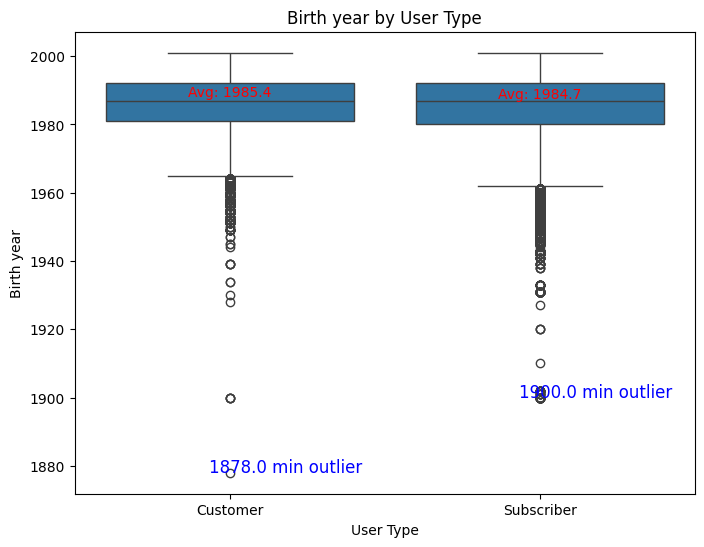

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='user_type', y='member_birth_year', data=df)
plt.title('Birth year by User Type')
plt.xlabel('User Type')
plt.ylabel('Birth year');
min_outliers = df.groupby('user_type')['member_birth_year'].min()

for a in range(len(min_outliers)):
    plt.annotate(str(min_outliers[a])+' min outlier', xy=(a, min_outliers[a]), xytext=(40, 10),
                     textcoords='offset points', ha='center', va='top', color='blue', fontsize=12)
    
    
    avg_values = df.groupby('user_type')['member_birth_year'].mean()

for i in range(len(avg_values)):
    plt.annotate(f'Avg: {avg_values[i]:.1f}',  
                     xy=(i, avg_values[i]),
                     xytext=(0, 5),  
                     textcoords='offset points',
                     ha='center', va='bottom',  
                     color='red')
    

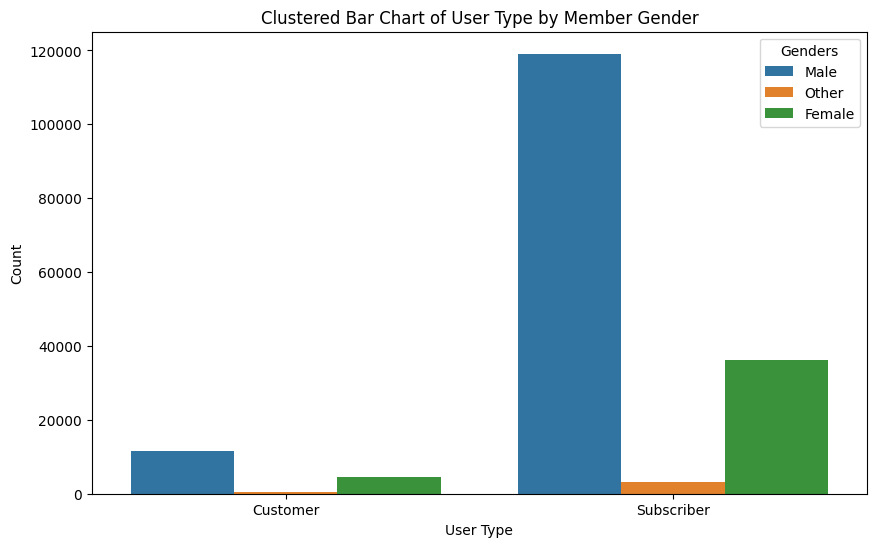

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='user_type', hue='member_gender', data=df)
plt.title('Clustered Bar Chart of User Type by Member Gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Genders')


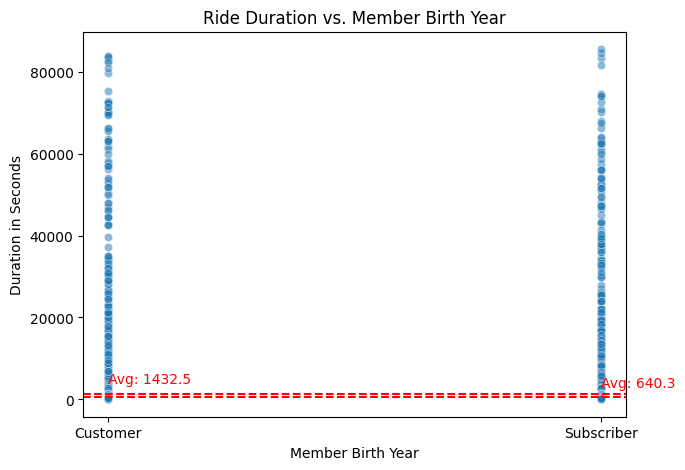

In [20]:
plt.figure(figsize=(7, 5))
sns.scatterplot(y='duration_sec', x='user_type', data=df, alpha=0.5)
def plot_la(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

av_durations = df.groupby('user_type')['duration_sec'].mean()


for user_type, duration in av_durations.items():
    plt.axhline(y=duration, color='red', linestyle='--')
    plt.annotate(f'Avg: {duration:.1f}',  
                         xy=(user_type, duration), 
                         xytext=(0, 10),  
                         textcoords='offset points',
                         color='red', 
                         va='center')

title='Ride Duration vs. Member Birth Year'
x='Member Birth Year'
y='Duration in Seconds'
plot_la(title,x,y)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we noticed the cusomers and subcribers takes the same time however, subscribers counts much more than customers ,also in box plot we can notice only min outliers with  avg 1985.4 for customer,and for subsribers 1984.7.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We can notice counts of male gender is much more than female,also, min outlires in subscribes much more cutomersn at last we can notice both subscribers and customers takes same duration time!.

## Multivariate Exploration


Text(0, 0.5, 'Duration (Sec)')

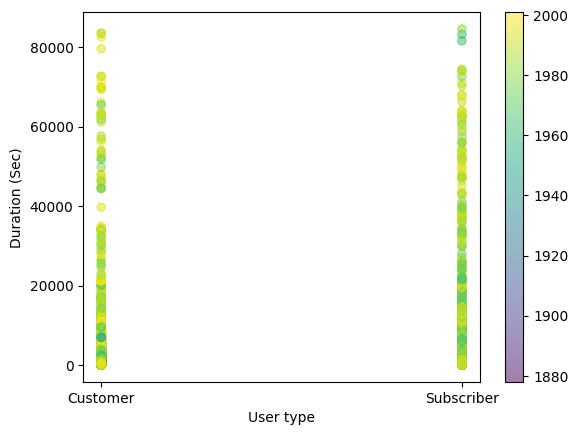

In [3]:
plt.scatter(data=df, x='user_type', y='duration_sec', c='member_birth_year',alpha=0.5)
plt.colorbar()
plt.xlabel('User type')
plt.ylabel('Duration (Sec)')

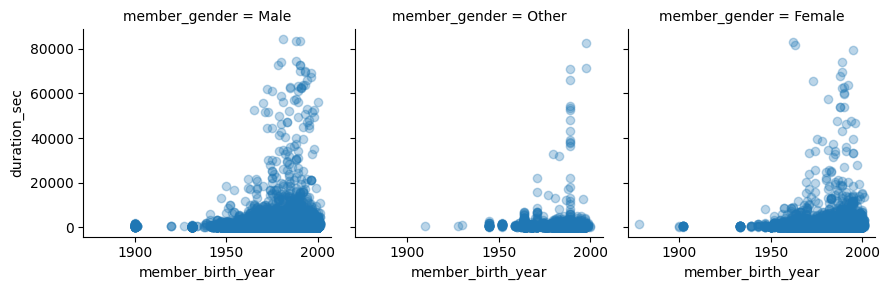

In [45]:
g = sns.FacetGrid(data=df, col='member_gender')
g.map(plt.scatter, 'member_birth_year','duration_sec',alpha=0.3)

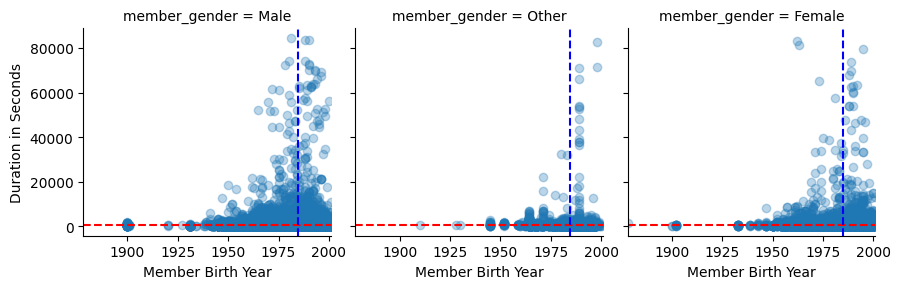

In [21]:
g = sns.FacetGrid(data=df, col='member_gender')

g.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha=0.3)

mean_birth_year = df['member_birth_year'].mean()


for ax in g.axes.flat:
    ax.axhline(df['duration_sec'].mean(), color='red', ls='--')  
    ax.axvline(mean_birth_year, color='blue', ls='--')  

g.set_axis_labels('Member Birth Year', 'Duration in Seconds')
g.set(xlim=(df['member_birth_year'].min(), df['member_birth_year'].max())) 



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> we can notice clearly most people takes low duration of time except range of 1950 to 2000 part of them takes High duration of time. in Facet Plot we can notice the average of axis (Member Birth Year) determined as red line,and the the average of yaxis (Duration in Seconds) represented as the blue line.

### Were there any interesting or surprising interactions between features?

> We can notice there are many old people that uses bikes especially Male gender .

## Conclusions
>In the end by using python liabares for visualision can help us to investage and and visualise huge amount of data on few diagrams like what i did by usibg histogram,scatteplot,box plot.